In [1]:
import xarray

ds = xarray.load_dataset("IBTrACS.since1980.v04r00.nc",decode_times=False)


In [8]:
main_tracks = ds.sid[ds.track_type == b'main']

In [9]:
main_tracks

<xarray.DataArray 'sid' (storm: 4303)>
array([b'1980001S13173', b'1980003S15137', b'1980005S11059', ...,
       b'2021299N33284', b'2021307N09275', b'2021311N13248'], dtype='|S13')
Dimensions without coordinates: storm
Attributes:
    long_name:              SID (IBTrACS Serial ID)
    cf_role:                trajectory_id
    coverage_content_type:  auxiliaryInformation

## Number of USA tracked storms 

In [2]:
max_cat = ds.usa_sshs.max(dim=['date_time']) > 0


In [3]:
pos_cat = ds.usa_sshs.max(dim=['date_time'])[max_cat]

(array([1229.,  663.,  581.,  727.,  307.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ], dtype=float32),
 <BarContainer object of 5 artists>)

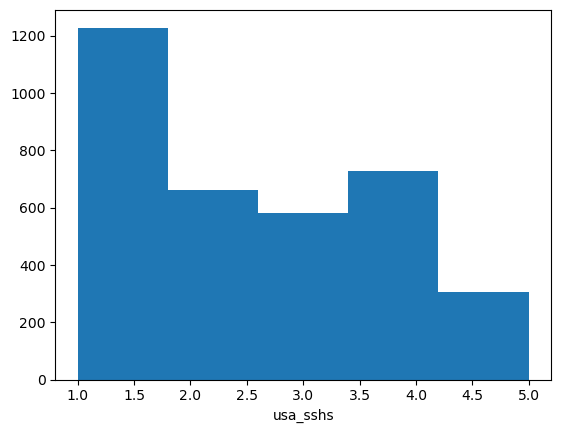

In [4]:
pos_cat.plot.hist(bins=5)

In [5]:
ds

<xarray.Dataset>
Dimensions:           (storm: 13664, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) float64 -5.867e+03 -5.867e+03 ... nan
    lat               (storm, date_time) float32 10.9 10.87 10.84 ... nan nan
    lon               (storm, date_time) float32 80.3 79.83 79.35 ... nan nan
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 65.0 25.0 49.0 89.0 ... 37.0 29.0 21.0 3.0
    sid               (storm) |S13 b'1842298N11080' ... b'2022286N15151'
    season            (storm) float32 1.842e+03 1.845e+03 ... 2.022e+03
    number            (storm) int16 1 1 1 2 3 4 5 6 ... 73 74 75 76 77 78 79 80
    basin             (storm, date_time) |S2 b'NI' b'NI' b'NI' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'BB' b'BB' b'BB' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 nan nan nan nan ... nan nan nan
    reunion_gust_per  (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_seahgt        (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_searad        (storm, date_time, quadrant) float32 nan nan ... nan nan
    storm_speed       (storm, date_time) float32 9.0 9.0 9.0 9.0 ... nan nan nan
    storm_dir         (storm, date_time) float32 266.0 267.0 267.0 ... nan nan
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [46]:
ds

<xarray.Dataset>
Dimensions:           (storm: 13664, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) float64 -5.867e+03 -5.867e+03 ... nan
    lat               (storm, date_time) float32 10.9 10.87 10.84 ... nan nan
    lon               (storm, date_time) float32 80.3 79.83 79.35 ... nan nan
  * storm             (storm) |S13 b'1842298N11080' ... b'2022286N15151'
Dimensions without coordinates: date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 65.0 25.0 49.0 89.0 ... 37.0 29.0 21.0 3.0
    sid               (storm) |S13 b'1842298N11080' ... b'2022286N15151'
    season            (storm) float32 1.842e+03 1.845e+03 ... 2.022e+03
    number            (storm) int16 1 1 1 2 3 4 5 6 ... 73 74 75 76 77 78 79 80
    basin             (storm, date_time) |S2 b'NI' b'NI' b'NI' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'BB' b'BB' b'BB' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 nan nan nan nan ... nan nan nan
    reunion_gust_per  (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_seahgt        (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_searad        (storm, date_time, quadrant) float32 nan nan ... nan nan
    storm_speed       (storm, date_time) float32 9.0 9.0 9.0 9.0 ... nan nan nan
    storm_dir         (storm, date_time) float32 266.0 267.0 267.0 ... nan nan
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

### TC by basin

In [10]:
import numpy as np
rng = np.random.default_rng(seed=42)


In [32]:
sids = ds.sid[(ds.track_type == b'main') & (~np.isnan(ds.usa_wind[:,0]))].to_numpy()
sidsshuffle = rng.permutation(sids)

In [36]:
sidsshuffle.shape[0]

3126

In [37]:
train_storms = sidsshuffle[:2100]
validation_storms = sidsshuffle[2100:2600]
test_storms = sidsshuffle[2600:]

In [38]:
ds = ds.assign_coords(storm=ds.sid)

In [67]:
train_lat = ds.lat.loc[train_storms][:,:15].to_numpy()
train_lon = ds.lon.loc[train_storms][:,:15].to_numpy()
train_pres = ds.usa_pres.loc[train_storms][:,:15].to_numpy()
train_wind = ds.usa_wind.loc[train_storms][:,:15].to_numpy()
train_dist2land = ds.dist2land.loc[train_storms][:,15].to_numpy()

In [88]:
validation_lat = ds.lat.loc[validation_storms][:,:15].to_numpy()
validation_lon = ds.lon.loc[validation_storms][:,:15].to_numpy()
validation_pres = ds.usa_pres.loc[validation_storms][:,:15].to_numpy()
validation_wind = ds.usa_wind.loc[validation_storms][:,:15].to_numpy()
validation_dist2land = ds.dist2land.loc[validation_storms][:,15].to_numpy()

In [79]:
max_windspeed = ds.usa_wind.loc[train_storms].max(dim='date_time').to_numpy()
max_cat = ds.usa_sshs.loc[train_storms].max(dim='date_time')
max_cat = xarray.where(max_cat >= 0,max_cat,0).to_numpy()

In [78]:
max_cat

array([0., 0., 0., ..., 1., 2., 0.], dtype=float32)

In [89]:
train_x = np.column_stack([train_lat,train_lon,train_pres,train_wind,train_dist2land])
valid_x = np.column_stack([validation_lat,validation_lon,validation_pres,validation_wind,validation_dist2land])

In [95]:
valid_y = ds.usa_sshs.loc[validation_storms].max(dim='date_time')
valid_y = xarray.where(valid_y >= 0,valid_y,0).to_numpy()

## classification of SSHS scale 

In [90]:
from sklearn.impute import SimpleImputer

simp_imp = SimpleImputer(strategy='constant',fill_value=0)
train_x_impute = simp_imp.fit_transform(train_x)
valid_x = simp_imp.transform(valid_x)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x_impute,max_cat)

RandomForestClassifier()

In [96]:
pred_val_y = rf.predict(valid_x)

In [101]:
from sklearn.metrics import accuracy_score,classification_report

print("ACC:"+str(accuracy_score(valid_y,pred_val_y)))
print(classification_report(valid_y,pred_val_y))

ACC:0.566
              precision    recall  f1-score   support

         0.0       0.68      0.91      0.78       276
         1.0       0.33      0.21      0.26        75
         2.0       0.00      0.00      0.00        36
         3.0       0.00      0.00      0.00        38
         4.0       0.26      0.25      0.26        55
         5.0       0.17      0.05      0.08        20

    accuracy                           0.57       500
   macro avg       0.24      0.24      0.23       500
weighted avg       0.46      0.57      0.50       500

